In [668]:
import pandas as pd
File = pd.read_csv("ratings.csv")
Ratings = pd.DataFrame(File)
Ratings.head()

,Unnamed: 0,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [670]:
Ratings.reset_index(inplace=True)
Ratings.columns

Index(['index', 'Unnamed: 0', 'minority', 'age', 'gender', 'credits', 'beauty',
       'eval', 'division', 'native', 'tenure', 'students', 'allstudents',
       'prof', 'PrimaryLast', 'vismin', 'female', 'single_credit',
       'upper_division', 'English_speaker', 'tenured_prof'],
      dtype='object')

In [672]:
Ratings.drop(["index", "Unnamed: 0"], axis=1, inplace=True)

### Exploratory Statistics

In [675]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

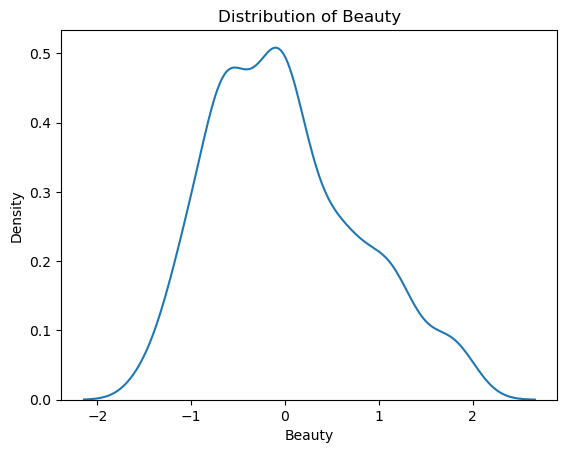

In [677]:
#getting a general kde distribution of beauty
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(x=Ratings["beauty"])
plt.xlabel("Beauty")
plt.ylabel("Density")
plt.title("Distribution of Beauty")
plt.show()

### Grouping Statistics

In [680]:
# Calculating the continuous value based on descriptive statistics of students based on gender
Ratings.groupby("gender").agg({"students":["mean", "std", "var"]}).reset_index()

gender   students                        
                mean        std          var
0  female  31.251282  25.137015   631.869522
1    male  40.533582  54.875095  3011.276022

Grouping Statistics to count the number of professors who are of certain gender and tenured. This calcuation type is very important to create numbers out of categorical variables for social science researches 

In [683]:
Tenure_count = Ratings[Ratings["tenure"] == "yes"].groupby("gender", as_index=False)["tenure"].count() 
Tenure_count

,gender,tenure
0,female,145
1,male,216


In [685]:
Tenure_count["Percentage"] = (Tenure_count["tenure"]/Tenure_count["tenure"].sum())*100
Tenure_count["Percentage"]

0    40.166205
1    59.833795
Name: Percentage, dtype: float64

In [687]:
#Calculating the number of ethnically minor teachers who are tenured professors
Minority_tenure = Ratings[Ratings["tenure"]=="yes"].groupby("minority",as_index = False)["tenure"].count()
Minority_tenure

,minority,tenure
0,no,307
1,yes,54


In [689]:
Minority_tenure["Percentage"] = (Minority_tenure["tenure"]/Minority_tenure["tenure"].sum())*100
Minority_tenure["Percentage"]
#it appears only about 15% of the tenured professors appeared to be ethnically minor

0    85.041551
1    14.958449
Name: Percentage, dtype: float64

In [691]:
#Calculating descriptive statistics of professors with different age groups based on tenure
Ratings.groupby("tenure", as_index = False)["age"].agg(["mean", "std"]) 

,tenure,mean,std
0,no,50.186275,6.946372
1,yes,47.850416,10.420056


In [693]:
#Calculating median evaluation score of tenured versus untenured professor
Tenure_eval = Ratings.groupby("tenure", as_index = False)["eval"].median()
Tenure_eval

,tenure,eval
0,no,4.2
1,yes,4.0


Text(0.5, 1.0, 'eval score based on tenure')

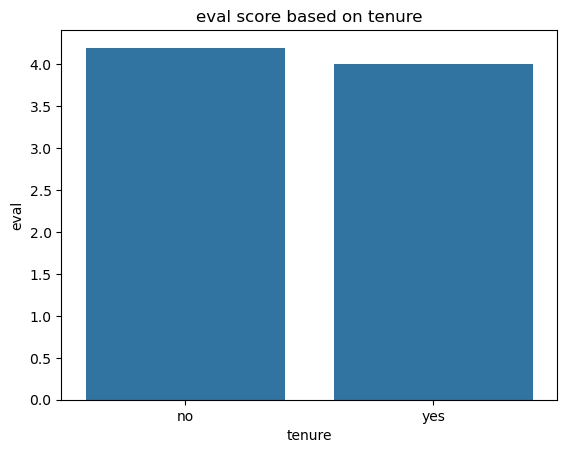

In [695]:
#The eval scores based on tenure type can be plotted too
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = Tenure_eval["tenure"], y = Tenure_eval["eval"])
plt.title("eval score based on tenure")

In [696]:
#Calculating a range of descriptive statistics based on beauty and age for professors with different gender
Ratings.groupby("gender", as_index = False)[["beauty", "age"]].agg(["mean", "std", "var"]).set_index("gender")

beauty                           age                     
            mean      std       var       mean       std        var
gender                                                             
female  0.116109  0.81781  0.668813  45.092308  8.532031  72.795559
male   -0.084482  0.75713  0.573246  50.746269  9.993396  99.867964

In [699]:
#Although there are only 94 professors in our given dataframe, there are 463 observations, which means some professors could be teaching more than 
#one course, as each row in a dataframe pertains to a class that provide unique evaluations for all professors 
print(Ratings["prof"].nunique())
print(Ratings.shape)

94
(463, 19)


In [701]:
#Let's recreate the ratings dataframe with non-duplicate professors and run the above grouped descpritive statistics 
Ratings_uniq = Ratings.drop_duplicates(subset = ["prof"])
Ratings_uniq.shape

(94, 19)

In [703]:
Ratings_uniq.groupby("gender", as_index = False)[["beauty", "age"]].agg(["mean", "std", "var"]).set_index("gender")

beauty                            age                       
            mean       std       var       mean        std         var
gender                                                                
female  0.252303  0.843667  0.711774  44.950000   8.935524   79.843590
male   -0.033098  0.801559  0.642497  49.481481  10.813585  116.933613

### Data Visualization

Text(0.5, 1.0, 'eval score based on age and gender')

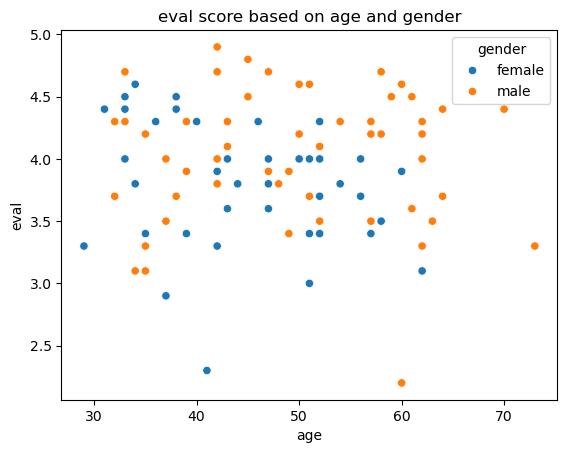

In [706]:
#creating a scatterplot between age and evalscore and visualizing difference in gender through color code
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x = Ratings_uniq["age"], y = Ratings_uniq["eval"], hue = Ratings_uniq["gender"])
plt.title("eval score based on age and gender")

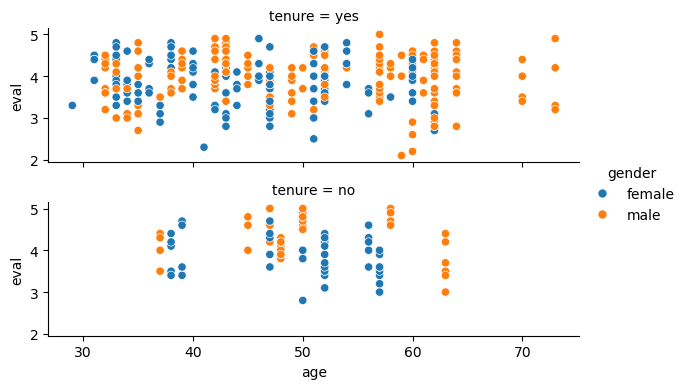

In [708]:
#Complex Scatterplotting
sns.relplot(x=Ratings["age"], y=Ratings["eval"], hue=Ratings["gender"], row=Ratings["tenure"],
           height=2, aspect=3) #.scatterplot() cannot perform row visualization function

<Axes: xlabel='gender', ylabel='beauty'>

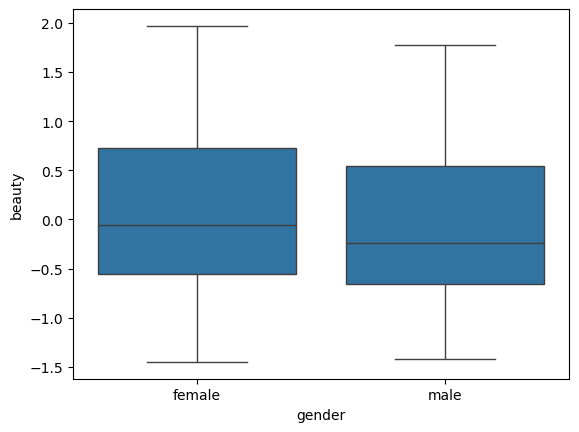

In [709]:
#comparing beauty across gender in boxplot
sns.boxplot(x = Ratings["gender"], y = Ratings["beauty"])

Categorizing age and evaluation score in boxplot

In [811]:
Ratings.columns

Index(['minority', 'age', 'gender', 'credits', 'beauty', 'eval', 'division',
       'native', 'tenure', 'students', 'allstudents', 'prof', 'PrimaryLast',
       'vismin', 'female', 'single_credit', 'upper_division',
       'English_speaker', 'tenured_prof', 'male'],
      dtype='object')

In [819]:
Bin_value = [0, 35, 70, Ratings['age'].max() + 1] #plus one because since we are exlcuding the right sides of our binned range we need to undo that for 
                                                  # the final range (i.e., 70 to max)
labeled = ["below 35", "between 35 and below 70", "between 70 and above"]
Ratings["Age_binned"] = pd.cut(Ratings["age"], Bin_value, labels = labeled, right=False) #excluding the rightmost value of our range such that the first range is from
                                                                                             #0-34, second is from 35-69, and the last is from 70-(max-last value)
Ratings["Age_binned"].value_counts()

Age_binned
between 35 and below 70    403
below 35                    52
between 70 and above         8
Name: count, dtype: int64

([0, 1, 2],
 [Text(0, 0, 'below 35'),
  Text(1, 0, 'between 35 and below 70'),
  Text(2, 0, 'between 70 and above')])

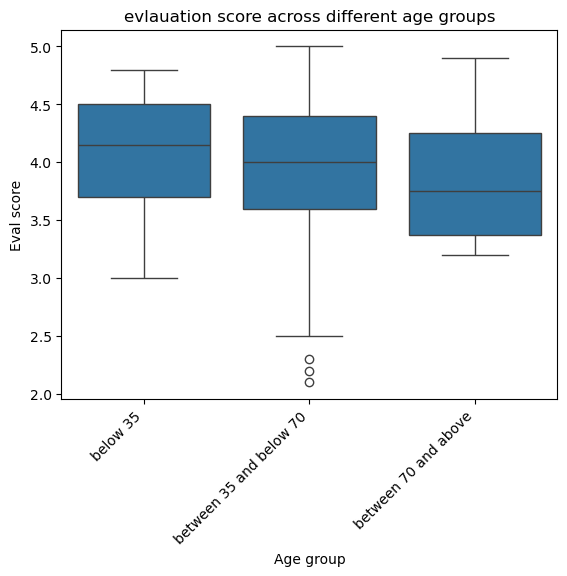

In [823]:
#Now boxplotting
import seaborn as sns
sns.boxplot(x= Ratings["Age_binned"], y = Ratings["eval"]) 
plt.title("evlauation score across different age groups")
plt.xlabel("Age group")
plt.ylabel("Eval score")
plt.xticks(rotation=45, ha="right")

Text(0.5, 1.0, 'count of male and female teachers for all class')

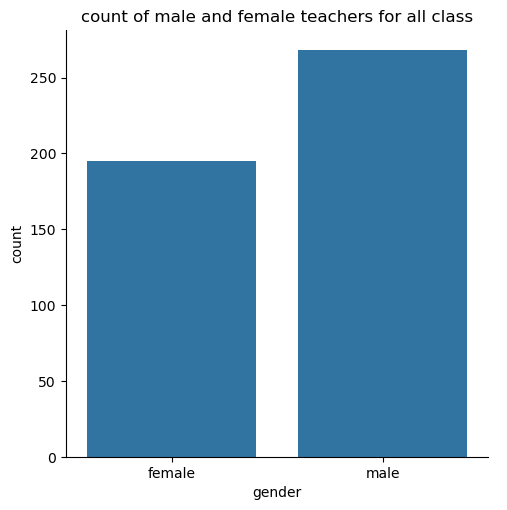

In [712]:
#Categorical plotting is a function in seaborn that allows visualization of categorical data without a y-value
import seaborn as sns
sns.catplot(x=Ratings["gender"], kind = "count")
plt.title("count of male and female teachers for all class")

Text(0.5, 1.0, 'count of tenured and non-tenured professors of different gender')

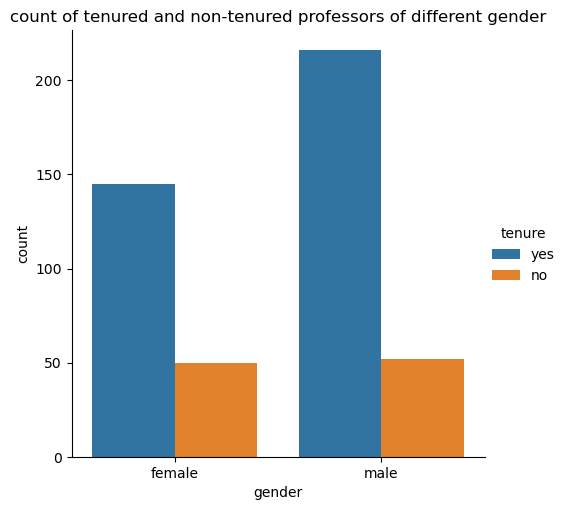

In [714]:
#count plotting both gender and tenure count 
sns.catplot(x=Ratings["gender"], hue=Ratings["tenure"], kind="count")
plt.title("count of tenured and non-tenured professors of different gender")

Text(0.5, 1.0, 'ethnically minor professorors with and without tenure based on gender')

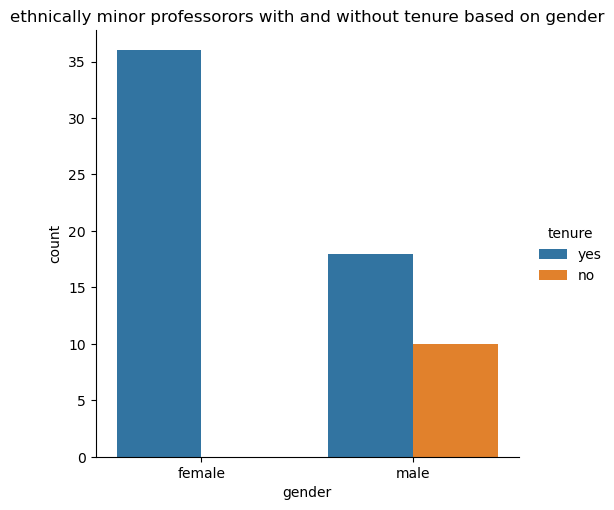

In [716]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = Ratings[Ratings["minority"] == "yes"]["gender"], hue=Ratings["tenure"], kind="count")
plt.title("ethnically minor professorors with and without tenure based on gender")
#surprisingly no ethnically minor female professors are without tenure

Text(0.5, 1.0, 'compound category observation')

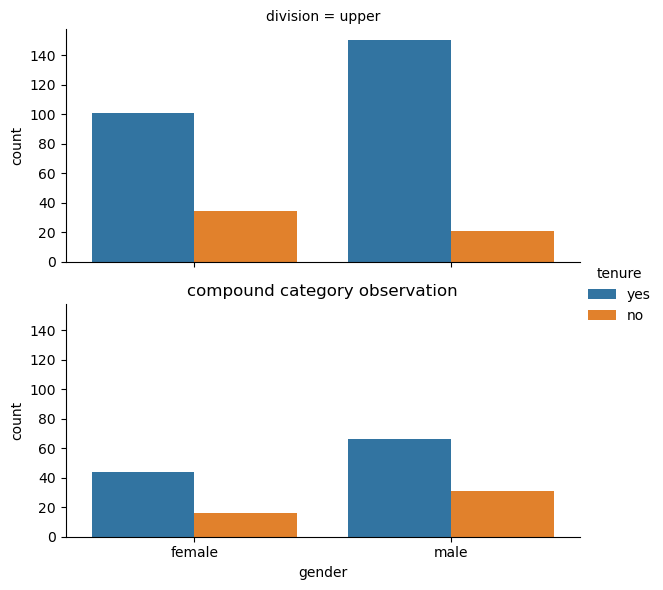

In [718]:
#Adding division as rows in the barplot mix
sns.catplot(x=Ratings["gender"], hue=Ratings["tenure"], row=Ratings["division"], kind="count", height=3, aspect=2) #if height and width is not adjusted
                                                                                                                   #the figure appears elongated
plt.title("compound category observation")

Text(0.5, 1.0, 'distribution of evaluation score across the sample')

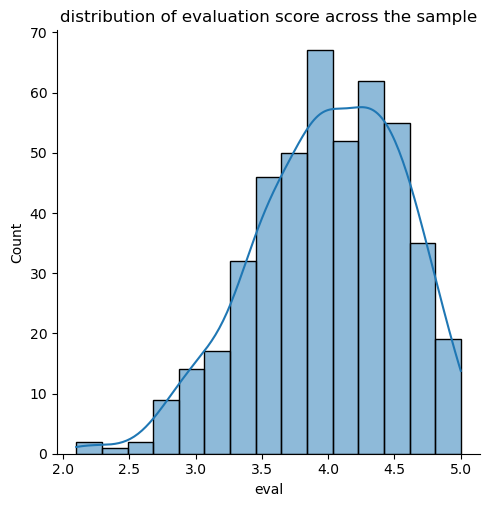

In [720]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(x=Ratings["eval"], kde=True)
plt.title("distribution of evaluation score across the sample")

In [721]:
print(Ratings.columns)
print(Ratings["gender"].unique())

Index(['minority', 'age', 'gender', 'credits', 'beauty', 'eval', 'division',
       'native', 'tenure', 'students', 'allstudents', 'prof', 'PrimaryLast',
       'vismin', 'female', 'single_credit', 'upper_division',
       'English_speaker', 'tenured_prof'],
      dtype='object')
['female' 'male']


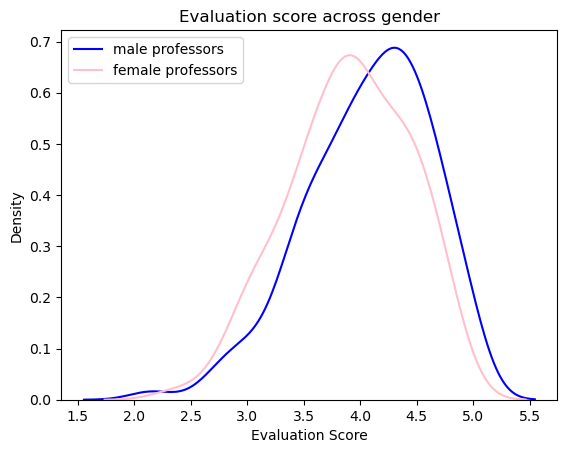

In [724]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(Ratings[Ratings["gender"] == "male"]["eval"], color = "blue", label = "male professors")
sns.kdeplot(Ratings[Ratings["gender"] == "female"]["eval"], color = "pink", label = "female professors")

plt.title("Evaluation score across gender")
plt.xlabel("Evaluation Score")
plt.legend()
plt.show()

### Probability and Distribution

The norm.pdf module within the scipy package provides an array of insight and decision-support statistics based on normal distribution curve 

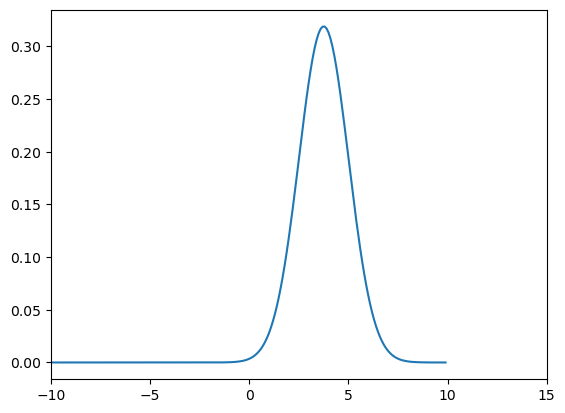

In [728]:
#Building a normal distribution curve out of a given mean and standard deviation value for a given dataset
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x_axis = np.arange(-10, 10, 0.1)
plt.plot(x_axis, norm.pdf(x_axis, 3.76, 1.25))
plt.xlim(-10,15)
plt.show()

#### T-Test statistics to test the statistical significance of difference in means between two datasets
Allows identification of statistical relationship between two Categorical variables and continuous variable 

In [731]:
#Using t_test statistics measurement function of the scipy package to test whether the mean difference in evaluation score between the 
#male and female professors are statistically significant to imply it
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(Ratings.groupby("gender")["eval"].mean())

gender
female    3.901026
male      4.069030
Name: eval, dtype: float64


In [826]:
#Now lets check if the mean difference of 0.1 regarding the evaluation score of the two gender is statistically significant
# lets assume that we are willing to risk 5% statistical error (i.e., alpha = 0.05)
import scipy.stats
#conducting levene's test is important before conducting t-test or ANOVA becaysit is necessary to check whether the variances of the different datasets are equal
#It is essential for the variances to be equal to ensure the accuracy of the test, and it is presumed that they are equal until a significant value from levene's test
#stating otherwise is generated. 
scipy.stats.levene(Ratings[Ratings["gender"] == "male"]["eval"],   
                   Ratings[Ratings["gender"] == "female"]["eval"], 
                   center = "mean") #the tet will be centered around mean score
#since the p-value of the test is insignificant, the null hypothesis of equal variances between the two datasets cannot be rejected

LeveneResult(statistic=np.float64(0.19032922435292574), pvalue=np.float64(0.6628469836244741))

In [735]:
scipy.stats.ttest_ind(Ratings[Ratings["gender"] == "male"]["eval"], 
                      Ratings[Ratings["gender"] == "female"]["eval"], 
                     equal_var = True)
#The function returns the t-test statistics of 3.24993 and the p-value of 0.001 with 461 degree of freedom.
#Since the t-test score is more than atleast 1.64 (the universal t-test number above which confirmations can be made) and p-value is less than the allowed risk of 0.05,
#we accept that the difference is statistically significant, and the observation of male scoring more than female is universally true. 
#t-test appears to be a good recourse to compare categorical variables that are reinforced with contunous ratio and interval data.

TtestResult(statistic=np.float64(3.249937943510772), pvalue=np.float64(0.0012387609449522217), df=np.float64(461.0))

In [737]:
#Also, observing if tenure affects evaluation score
import scipy.stats
scipy.stats.levene(Ratings[Ratings["tenure"] == "yes"]["eval"],
                   Ratings[Ratings["tenure"] == "no"]["eval"], 
                   center = "mean")
#Since the p-value of the levene statistcs is not significant, the null hypothesis of equal variance cannot be rejected

LeveneResult(statistic=np.float64(0.44389295824627134), pvalue=np.float64(0.5055827160360271))

In [884]:
scipy.stats.ttest_ind(Ratings[Ratings["tenure"] == "yes"]["eval"],
                   Ratings[Ratings["tenure"] == "no"]["eval"], 
                   equal_var = True)
#Since the p-value of the t-test statistics (-2.8046) is significant, a relationship between evaluation scire and tenure is identified 

TtestResult(statistic=np.float64(-2.8046798258451777), pvalue=np.float64(0.005249471210198792), df=np.float64(461.0))

Replacing the t-test with regression by converting the categorical values of the x-variable into dummies

In [741]:
#Finding regression between gender type and evaluation score
gender_male = pd.get_dummies(Ratings["gender"]).astype(int) #first we need the convert the categorical variables into dummies
gender_male.drop(columns = "female", inplace = True)
Ratings = pd.concat([Ratings, gender_male], axis=1)
Ratings.columns
#Ratings["gender_binary"].value_counts()

Index(['minority', 'age', 'gender', 'credits', 'beauty', 'eval', 'division',
       'native', 'tenure', 'students', 'allstudents', 'prof', 'PrimaryLast',
       'vismin', 'female', 'single_credit', 'upper_division',
       'English_speaker', 'tenured_prof', 'male'],
      dtype='object')

In [860]:
import statsmodels.api as sm #This package seem to be more useful for academic purposes for writing papers
x = Ratings["male"]
y = Ratings["eval"]
z = sm.add_constant(x) #adding constant is bit of manual work with this package, sklearn adds intercepts automatically

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(predictions[0:7])
print(model.summary()) #This kind of cool to place in reports and papers. Probably, this is the only comparativ advantage of this package
                       #compared to sklearn. Just return it through print or else it will look ugly

0    0.00000
1    0.00000
2    0.00000
3    0.00000
4    4.06903
5    4.06903
6    4.06903
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                   eval   R-squared (uncentered):                   0.588
Model:                            OLS   Adj. R-squared (uncentered):              0.587
Method:                 Least Squares   F-statistic:                              659.9
Date:                Tue, 20 May 2025   Prob (F-statistic):                    4.75e-91
Time:                        13:55:28   Log-Likelihood:                         -1097.6
No. Observations:                 463   AIC:                                      2197.
Df Residuals:                     462   BIC:                                      2201.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
              

#### Analysis of Variance (ANOVA) to test the statistical significance of difference in means between multiple datasets 
Allows identification of statistical relationship between multiple Categorical variables and continuous variable 

In [793]:
#Checking whether beauty of professors change with Age through mean (Although it could be done better with inferential statistics like correlation)
Age_below_40 = Ratings[Ratings["age"] <= 40]
Age_between_40_55 = Ratings[(Ratings["age"]>40) & (Ratings["age"]<55)] 
Age_above_55 = Ratings[Ratings["age"] >= 55]

#Checking for variance equality between the three datasets
import scipy.stats
scipy.stats.levene(Age_below_40["beauty"], Age_between_40_55["beauty"], Age_above_55["beauty"], center = "mean")
#Since the p-value of the Levene statistics is signifcant, we cannot assume the variance of the three datasets to be equal 

LeveneResult(statistic=np.float64(8.907059777364461), pvalue=np.float64(0.0001602271414506552))

In [795]:
f_statistics, p_value = scipy.stats.f_oneway(Age_below_40["beauty"], Age_between_40_55["beauty"], Age_above_55["beauty"]) #equal_var = True is not assumed 
round(f_statistics, 3), p_value
#The F-statistics in 19.619 and the p-value is very less, and therefore, it can be assumed that the difference in beauty based on age is statistically significant

(np.float64(19.619), np.float64(6.6641160169501756e-09))

#### Chi-square test to compare relationship across categorical variables
Allows identification of statistical relationship acros two categorical variables

In [362]:
#Searching for association between tenure and gender being both categorical variable
import pandas as pd
import scipy.stats
cross_table = pd.crosstab(Ratings["tenure"], Ratings["gender"]) #must be special function with pandas
print(cross_table)
print(scipy.stats.chi2_contingency(cross_table, correction=False))
#The p-value of the Chi-square result (2.557) is above 0.1, and therefore the null hypothesis regarding no relationship between the variables cannot be rejected
# the Degree of Freedom is 1 and the expected array that could mask the cross_table is also provided

gender  female  male
tenure              
no          50    52
yes        145   216
Chi2ContingencyResult(statistic=np.float64(2.557051129789522), pvalue=np.float64(0.10980322511302845), dof=1, expected_freq=array([[ 42.95896328,  59.04103672],
       [152.04103672, 208.95896328]]))


In [378]:
#Identifying relationship between minority and tenure
import pandas as pd
import scipy.stats
cross_table = pd.crosstab(Ratings["tenure"], Ratings["minority"])
print(cross_table)
print(scipy.stats.chi2_contingency(cross_table, correction = False))
#the p-value is insignificant so no relationship between the two categotical variables can be established

minority   no  yes
tenure            
no         92   10
yes       307   54
Chi2ContingencyResult(statistic=np.float64(1.7738347714310483), pvalue=np.float64(0.18290820703797092), dof=1, expected_freq=array([[ 87.90064795,  14.09935205],
       [311.09935205,  49.90064795]]))


#### Z-scoring (Standardization) to check probability of data occurence based on Cummulative Distribution Function 

In [308]:
#Lets identify the probability of scoring more than 4.5 for a professor
import numpy as np
x1 = 4.5
x_mean = np.round(Ratings["eval"].mean(), 3) #it is suggested to round up the scores at least upto three decimal scores 
x_std = np.round(Ratings["eval"].std(), 3)
print(x_mean, x_std)

3.998 0.555


In [386]:
from scipy.stats import norm
prob0 = scipy.stats.norm.cdf((4.5-3.998)/0.555) #This calcuates the probability for the teacher to score 4 or less based on Cummulative Distribution Function
prob1 = 1-prob0
print(f"There is only {prob1*100} percent chances for a professor to score more than 4.5")
print(f"Meanwhile, {round(prob0, 3)} number of standard deviation (i.e., z-score) is between the value of 4.5 and mean") 

There is only 18.28639734596742 percent chances for a professor to score more than 4.5
Meanwhile, 0.817 number of standard deviation (i.e., z-score) is between the value of 4.5 and mean


In [312]:
#Now identifying the probability of scoring more than 3.5 and equal to or less than 4.5
from scipy.stats import norm
prob2 = scipy.stats.norm.cdf((3.5-3.998)/0.555)
probx = np.round((prob0 - prob2), 2) #rounding up the value to two decimal places
print(f"There is {probx*100} percent chances for a professor to score between 4.5 or more and less than  3.5")

There is 63.0 percent chances for a professor to score between 4.5 or more and less than  3.5


In [397]:
from scipy.stats import norm
prob0 = scipy.stats.norm.cdf((6.90-5.85)/0.35)
prob1 = 1-prob0
prob1

np.float64(0.0013498980316301035)